In [1]:
name = "Mmukul Khedekar"
roll_number = 22114054

In [14]:
# import iitr id profile

import requests

profile_url = "https://channeli.in/media/kernel/display_pictures/09559ef8-2c55-48a3-b1c9-28e8f37e4184.png"
response = requests.get(profile_url, stream=True)

with open("image.png", "wb") as f:
    f.write(response.content)


# problem A

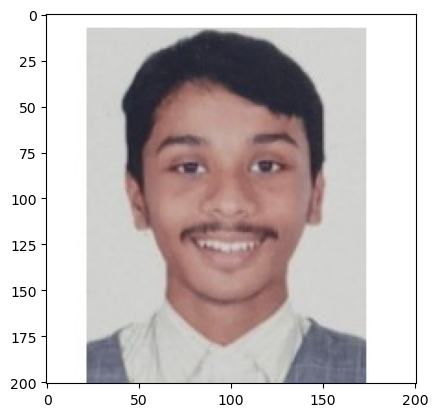

In [41]:
# load the image

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open("image.png")
img_array = np.array(img)

plt.imshow(img_array)
plt.show()



In [75]:
# singular value decomposition code

def singular_value_decomposition(img_array, num_components):
    imgnew_array = img_array.reshape(img_array.shape[0], img_array.shape[1] * img_array.shape[2])

    U, s, V = np.linalg.svd(imgnew_array)
    reconstructed_image = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
    reconstructed_image = reconstructed_image.reshape(img_array.shape[0],img_array.shape[1],img_array.shape[2])
    reconstructed_image = np.round(reconstructed_image)
    reconstructed_image = reconstructed_image.astype(int)
    
    return reconstructed_image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


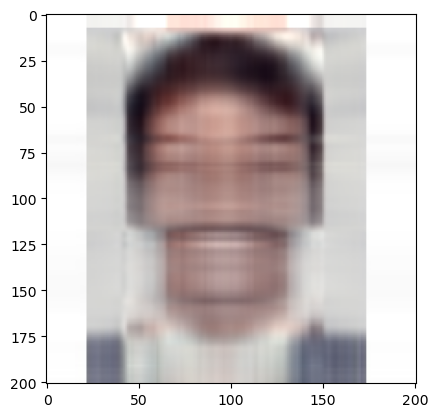

In [76]:
img_5 = singular_value_decomposition(img_array, 5)
plt.imshow(img_5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


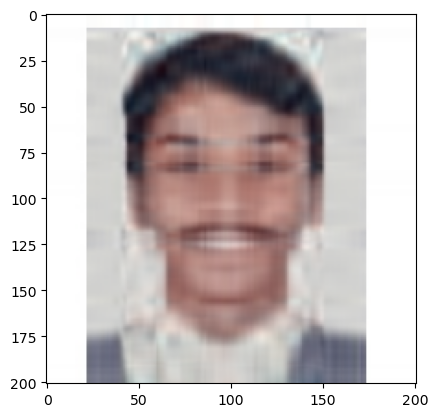

In [77]:
img_10 = singular_value_decomposition(img_array, 10)
plt.imshow(img_10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


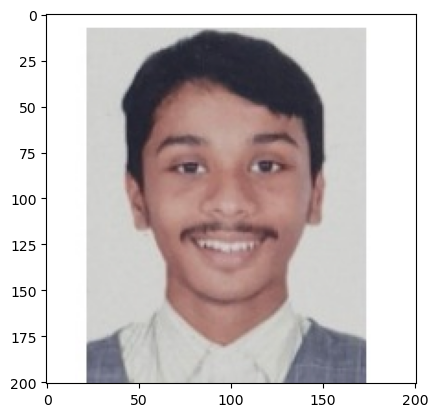

In [78]:
img_100 = singular_value_decomposition(img_array, 100)
plt.imshow(img_100)

# problem B

In [2]:
# load the IRIS dataset 

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)


In [20]:
# perform principal component analysis 

from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
iris_reduced = pca.fit_transform(iris.data)


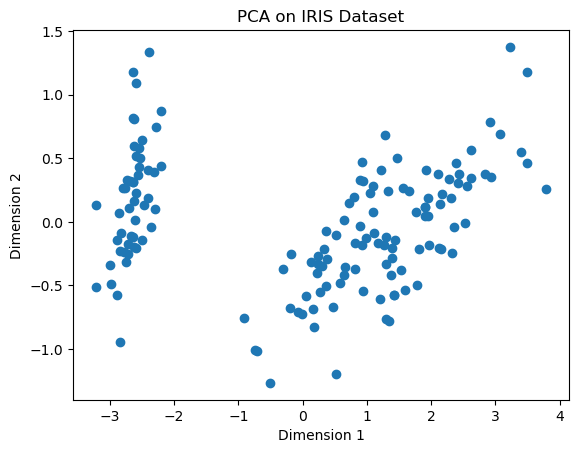

In [21]:
# create a scatter plot 

import matplotlib.pyplot as plt 

plt.scatter(iris_reduced[:, 0], iris_reduced[:, 1])

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("PCA on the IRIS Dataset")

plt.show()

In [24]:
# compute the explained variance 

explained_variance = pca.explained_variance_
print(explained_variance)

[4.22824171 0.24267075]


# problem C

In [25]:
# load the IRIS dataset

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)


In [29]:
# perform LDA on the dataset 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
iris_lda = lda.fit_transform(iris.data, iris.target)


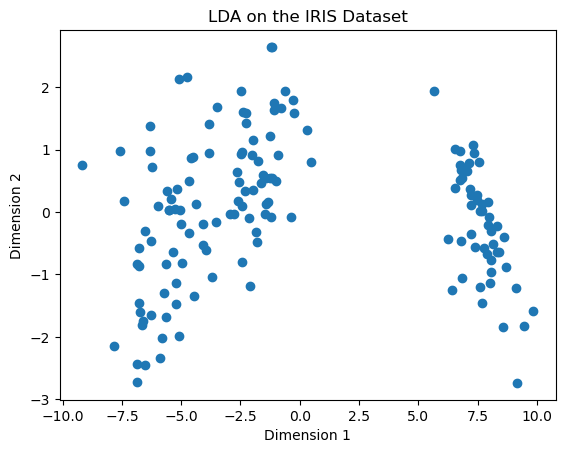

In [30]:
# create a scatter plot

import matplotlib.pyplot as plt

plt.scatter(iris_lda[:, 0], iris_lda[:, 1])

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("LDA on the IRIS Dataset")

plt.show()

# problem D

In [52]:
# choose a sample matrix 

import numpy as np

A = np.matrix([[-1, 4, 0, 5],
               [0, 1, 10, -3],
               [-5, 2, -1, -3]])


In [79]:
# get eigenvalues and eigenvectors

AAt = A@A.T
AtA = A.T@A

eval1, evec1 = np.linalg.eig(AAt)
eval2, evec2 = np.linalg.eig(AtA)

sort_indices_AAt = np.argsort(eval1)[::-1]
eval1 = eval1[sort_indices_AAt]
evec1 = evec1[:, sort_indices_AAt]

sort_indices_AtA = np.argsort(eval2)[::-1]
eval2 = eval2[sort_indices_AtA]
evec2 = evec2[:, sort_indices_AtA]

eval1 = np.round(eval1, decimals=3)
eval2 = np.round(eval2, decimals=3)

print(eval1)
print(eval2)

[111.758  41.551  37.691]
[111.758  41.551  37.691  -0.   ]


In [80]:
# Take non-zero eigenvalues (top min(m,n))
rank = min(A.shape)
sigma = np.sqrt(eval1[:rank])

# Extract corresponding eigenvectors
U = evec1[:, :rank]
V = evec2[:, :rank]

In [81]:
for i in range(rank):
    v_i = V[:, i]
    Av_i = A @ v_i
    u_i = U[:, i]
    if not np.allclose(Av_i, sigma[i] * u_i, atol=1e-4):
        V[:, i] *= -1

# Reconstruct A
reconstructed_A = np.zeros_like(A, dtype=float)
for i in range(rank):
    reconstructed_A += sigma[i] * np.outer(U[:, i], V[:, i])

print("Original A:")
print(A)
print("\nReconstructed A:")
print(reconstructed_A)

Original A:
[[-1  4  0  5]
 [ 0  1 10 -3]
 [-5  2 -1 -3]]

Reconstructed A:
[[-1.00000761e+00  4.00001016e+00  4.06649349e-06  5.00000412e+00]
 [-1.04442154e-06  1.00000078e+00  9.99998468e+00 -2.99999314e+00]
 [-5.00001480e+00  2.00001018e+00 -1.00000168e+00 -3.00000272e+00]]


In [75]:
u = []
v = []

for i in range(len(eval1)):
    for j in range(len(eval2)):
        if eval1[i] == eval2[j]:
            u.append((eval1[i], evec1[i].T))
            v.append((eval2[j], evec2[j].T))

print(u)
print(v)

[(111.758, matrix([[-0.15623751],
        [ 0.8049636 ],
        [ 0.572384  ]])), (41.551, matrix([[0.98755789],
        [0.13779149],
        [0.07578209]])), (37.691, matrix([[ 0.01786782],
        [-0.57710234],
        [ 0.81647635]]))]
[(111.758, matrix([[ 0.00632814],
        [-0.56650113],
        [-0.75819435],
        [ 0.32276579]])), (41.551, matrix([[-0.3592144 ],
        [ 0.42786373],
        [ 0.0301574 ],
        [ 0.8288475 ]])), (37.691, matrix([[ 0.9324726 ],
        [ 0.19600461],
        [-0.00955412],
        [ 0.30329155]]))]


In [77]:
assert len(u) == len(v)

sum_matrix = 0
for i in range(len(u)):
    sum_matrix += pow(u[i][0], 0.5) * u[i][1] * v[i][1].T 

print(sum_matrix)
print(A)

[[-2.19485229  3.6808736   1.44321881  4.77644682]
 [-3.56895954 -5.13518371 -6.39138954  2.40827135]
 [ 4.5369238  -2.23639625 -4.62098949  3.87821653]]
[[-1  4  0  5]
 [ 0  1 10 -3]
 [-5  2 -1 -3]]
